In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:01.102459


# Load Data

In [2]:
%%time
data = pd.read_csv('NY property data.csv')
NY_data_orig = data.copy()

CPU times: user 1.41 s, sys: 150 ms, total: 1.56 s
Wall time: 1.57 s


In [3]:
data.shape

(1070994, 32)

In [4]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [6]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

# Data Wrangling

In [11]:
# look at the top 20 owners, remove the public owner which are the benign owners
remove_list=data["OWNER"].value_counts().head(20).index.tolist()
remove_list

['PARKCHESTER PRESERVAT',
 'PARKS AND RECREATION',
 'DCAS',
 'HOUSING PRESERVATION',
 'CITY OF NEW YORK',
 'DEPT OF ENVIRONMENTAL',
 'BOARD OF EDUCATION',
 'NEW YORK CITY HOUSING',
 'CNY/NYCTA',
 'NYC HOUSING PARTNERSH',
 'YORKVILLE TOWERS ASSO',
 'DEPARTMENT OF BUSINES',
 'DEPT OF TRANSPORTATIO',
 'MTA/LIRR',
 'PARCKHESTER PRESERVAT',
 'MH RESIDENTIAL 1, LLC',
 '434 M LLC',
 'LINCOLN PLAZA ASSOCIA',
 'DEUTSCHE BANK NATIONA',
 '561 11TH AVENUE TMG L']

In [12]:
# public owner list check
remove_list.remove ('YORKVILLE TOWERS ASSO')
remove_list.remove ('434 M LLC')
remove_list.remove ('DEUTSCHE BANK NATIONA')
remove_list.remove ('561 11TH AVENUE TMG L')
remove_list.append ( 'UNITED STATES OF AMER')
remove_list.append('U S GOVERNMENT OWNRD')
remove_list.append ('THE CITY OF NEW YORK')
remove_list.append ('NYS URBAN DEVELOPMENT' )
remove_list.append ('NYS DEPT OF ENVIRONME')
remove_list.append ('CULTURAL AFFAIRS' )
remove_list.append ('DEPT OF GENERAL SERVI')
remove_list.append ('DEPT RE-CITY OF NY')
remove_list

['PARKCHESTER PRESERVAT',
 'PARKS AND RECREATION',
 'DCAS',
 'HOUSING PRESERVATION',
 'CITY OF NEW YORK',
 'DEPT OF ENVIRONMENTAL',
 'BOARD OF EDUCATION',
 'NEW YORK CITY HOUSING',
 'CNY/NYCTA',
 'NYC HOUSING PARTNERSH',
 'DEPARTMENT OF BUSINES',
 'DEPT OF TRANSPORTATIO',
 'MTA/LIRR',
 'PARCKHESTER PRESERVAT',
 'MH RESIDENTIAL 1, LLC',
 'LINCOLN PLAZA ASSOCIA',
 'UNITED STATES OF AMER',
 'U S GOVERNMENT OWNRD',
 'THE CITY OF NEW YORK',
 'NYS URBAN DEVELOPMENT',
 'NYS DEPT OF ENVIRONME',
 'CULTURAL AFFAIRS',
 'DEPT OF GENERAL SERVI',
 'DEPT RE-CITY OF NY']

In [13]:
# removie the public owner
property_data=data[~data["OWNER"].isin(remove_list)].reset_index(drop=True)
property_data.shape

(1046826, 32)

In [14]:
data.shape

(1070994, 32)

In [15]:
len(data)-len(property_data)

24168

In [16]:
#ZIP
# replace nan with 0
missing_zips=np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

21772

In [17]:
# I noticed the zip is logged in ascending order. If before and after the zip are the same, fill with that value
for i in range(len(missing_zips)):
    if(property_data.loc[missing_zips[i]+1,'ZIP'] == property_data.loc[missing_zips[i]-1,'ZIP']):
        property_data.loc[missing_zips[i],'ZIP'] = property_data.loc[missing_zips[i]-1,'ZIP']

In [18]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

10245

In [19]:
# for remaining, fill in with the previous record's zip
for i in range(len(missing_zips)):
    property_data.loc[missing_zips[i],'ZIP']=property_data.loc[missing_zips[i]-1,'ZIP']

In [20]:
#STORIES
temp = property_data[property_data['STORIES'].isnull()]
len(temp)

43968

In [21]:
temp['TAXCLASS'].value_counts()

1B    19055
4     17979
2      3434
3      2416
1       877
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [22]:
mean_stories=property_data.groupby('TAXCLASS')['STORIES'].mean()
mean_stories

TAXCLASS
1      2.111633
1A     1.656867
1B     4.000000
1C     3.052748
1D     1.068966
2     16.310549
2A     2.844032
2B     4.001635
2C     4.744977
3      1.000000
4      5.517257
Name: STORIES, dtype: float64

In [23]:
property_data['STORIES']=property_data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    property_data.loc[(property_data['STORIES']==0)&(property_data['TAXCLASS']==index),'STORIES']=mean_stories[index]

In [24]:
#FULLVAL, AVLAND,AVTOT
property_data['FULLVAL'].replace('NaN',0)
temp = property_data[property_data['FULLVAL']!=0]
mean_fullval=temp.groupby('TAXCLASS')['FULLVAL'].mean()
mean_fullval

TAXCLASS
1     5.700059e+05
1A    3.352942e+05
1B    3.738399e+05
1C    7.615359e+05
1D    2.233614e+07
2     8.005832e+05
2A    8.639066e+05
2B    1.254525e+06
2C    7.723493e+05
3     8.510005e+04
4     2.772747e+06
Name: FULLVAL, dtype: float64

In [25]:
property_data['AVLAND'].replace('NaN',0)
temp_avland = property_data[property_data['AVLAND']!=0]
mean_avland=temp_avland.groupby('TAXCLASS')['AVLAND'].mean()
mean_avland

TAXCLASS
1      14901.860425
1A      2247.472465
1B      9185.394750
1C      8225.658898
1D    709303.793103
2      88471.102578
2A     31370.740197
2B     54607.394911
2C     25635.944099
3      28135.636364
4     444996.049088
Name: AVLAND, dtype: float64

In [26]:
property_data['AVTOT'].replace('NaN',0)
temp_avtot = property_data[property_data['AVTOT']!=0]
mean_avtot=temp_avtot.groupby('TAXCLASS')['AVTOT'].mean()
mean_avtot

TAXCLASS
1     2.502549e+04
1A    1.437036e+04
1B    9.189080e+03
1C    2.898447e+04
1D    1.166866e+06
2     3.602638e+05
2A    7.963525e+04
2B    1.790961e+05
2C    1.170418e+05
3     3.829505e+04
4     1.294237e+06
Name: AVTOT, dtype: float64

In [27]:
%%time
for index in mean_fullval.index:
    property_data.loc[ (property_data[ 'FULLVAL' ]==0 )& (property_data['TAXCLASS' ]==index) , 'FULLVAL' ]=mean_fullval[index]
    property_data.loc[ (property_data['AVLAND' ]==0)& (property_data['TAXCLASS' ]==index), 'AVLAND' ]=mean_avland[index]
    property_data.loc[ (property_data[ 'AVTOT' ]==0)& (property_data[ 'TAXCLASS' ]==index), 'AVTOT' ]=mean_avtot[index]

CPU times: user 997 ms, sys: 12.5 ms, total: 1.01 s
Wall time: 941 ms


In [28]:
# Because these 4 fields do not have NAs, we just need to replace Os and the 1s.
# We think zero and 1 are both invalid values for these fields, so replace them with NA.
# Calculate groupwise average. Replace O and 1's by NAs so they are not counted in calculating mean.
property_data.loc[property_data['LTFRONT']==0,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==0, 'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==0,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==0,'BLDDEPTH']=np.nan
property_data.loc[property_data['LTFRONT']==1,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==1,'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==1,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==1,'BLDDEPTH']=np.nan
                  
mean_LTFRONT=property_data.groupby(property_data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH=property_data.groupby(property_data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT=property_data.groupby(property_data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH=property_data.groupby(property_data['TAXCLASS'])['BLDDEPTH'].mean()

for index in mean_LTFRONT.index:
    property_data.loc[(property_data['LTFRONT'].isnull())&(property_data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]
    property_data.loc[(property_data['LTDEPTH'].isnull())&(property_data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    property_data.loc[(property_data['BLDFRONT'].isnull())&(property_data['TAXCLASS']==index), 'BLDFRONT']=mean_BLDFRONT[index]
    property_data.loc[(property_data['BLDDEPTH'].isnull()) & (property_data['TAXCLASS']==index), 'BLDDEPTH']=mean_BLDDEPTH[index]

In [29]:
data=property_data.copy()
data.shape

(1046826, 32)

In [30]:
data['ZIP']=data['ZIP'].astype(str)
data['zip3']=data['ZIP'].str[:3]

# Build variables

In [31]:
data['ltsize']=data['LTFRONT']*data['LTDEPTH']
data['bldsize']=data['BLDFRONT']*data['BLDDEPTH']
data['bldvol']=data['bldsize']*data['STORIES']

In [32]:
#normalize the value by size
data['r1']= data['FULLVAL'] / data['ltsize']
data['r2']= data['FULLVAL'] /data['bldsize']
data['r3']= data['FULLVAL'] / data['bldvol']
data['r4']= data['AVLAND'] / data['ltsize']
data['r5']= data['AVLAND']/ data['bldsize']
data['r6']= data['AVLAND']/ data['bldvol']
data['r7']= data['AVTOT']/ data['ltsize']
data['r8']= data['AVTOT']/data['bldsize']
data['r9']= data['AVTOT'] / data['bldvol']

In [33]:
# add in the inverse of all the 9 primary variables, to find both very high and very low value
for col in data.columns[36:]:
    data[col+'inv'] = 1/(data[col])

In [34]:
vars18 = ['r1','r2','r3','r4','r5','r6','r7','r8','r9',
          'r1inv','r2inv','r3inv','r4inv','r5inv','r6inv','r7inv','r8inv','r9inv']
zip5_mean = data.groupby('ZIP')[vars18].mean()
zip3_mean = data.groupby('zip3')[vars18].mean()
taxclass_mean = data.groupby('TAXCLASS')[vars18].mean()
borough_mean = data.groupby('BORO')[vars18].mean()
data = data.join(zip5_mean, on='ZIP', rsuffix='_zip5')
data = data.join(zip3_mean, on='zip3', rsuffix='_zip3')
data = data.join(taxclass_mean, on='TAXCLASS', rsuffix='_taxclass')
data = data.join(borough_mean, on='BORO', rsuffix='_boro')
rsuffix = ['_zip5', '_zip3', '_taxclass', '_boro']
for var in vars18:
    for r in rsuffix:
        data[str(var)+r] = data[var] / data[str(var)+r]

In [35]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,9,10,11
BBLE,1000010101,1000010201,1000041001,1000041002,1000041003
BORO,1,1,1,1,1
BLOCK,1,1,4,4,4
LOT,101,201,1001,1002,1003
...,...,...,...,...,...
r5inv_boro,0.000569,0.000168,0.003782,0.002617,0.002487
r6inv_boro,0.000147,0.000043,0.00883,0.00611,0.005805
r7inv_boro,0.106805,0.000076,0.011346,0.007851,0.004222
r8inv_boro,0.001731,0.000191,0.009388,0.006496,0.003494


In [36]:
save_record = data['RECORD']
save_record.head()

0     1
1     2
2     9
3    10
4    11
Name: RECORD, dtype: int64

In [37]:
data=data.drop(['RECORD','BBLE','BORO','BLOCK','LOT','EASEMENT','OWNER','BLDGCL','TAXCLASS','LTFRONT',
         'LTDEPTH','EXT','STORIES','FULLVAL','AVLAND','AVTOT','EXLAND','EXTOT','EXCD1','STADDR',
          'ZIP','EXMPTCL','BLDFRONT','BLDDEPTH','AVLAND2','AVTOT2','EXLAND2','EXTOT2','EXCD2','PERIOD',
          'YEAR','VALTYPE','zip3','ltsize','bldsize','bldvol'], axis=1)

In [38]:
stats = data.describe().transpose()

In [39]:
for i in stats:
    stats[i]=round(stats[i], 2)
stats['count']=stats['count'].astype(int)
stats

,count,mean,std,min,25%,50%,75%,max
r1,1046826,213.57,532.56,0.0,76.26,152.86,243.18,138637.34
r2,1046826,536.42,1027.44,0.0,211.82,500.00,683.82,310551.57
r3,1046826,244.08,498.82,0.0,82.50,239.06,336.23,227500.00
r4,1046826,10.46,69.98,0.0,2.35,4.60,7.23,22249.80
r5,1046826,22.82,378.51,0.0,6.20,14.98,20.29,334636.37
...,...,...,...,...,...,...,...,...
r5inv_boro,1046826,1.00,19.59,0.0,0.06,0.08,0.15,3428.86
r6inv_boro,1046826,1.00,29.41,0.0,0.01,0.02,0.05,3095.58
r7inv_boro,1046826,1.00,62.65,0.0,0.15,0.30,0.49,59181.76
r8inv_boro,1046826,1.00,24.76,0.0,0.08,0.13,0.21,13797.16


In [40]:
from sklearn.decomposition import PCA

In [41]:
#zscale all the data
data_zs = (data - data.mean()) / data.std()
data_zs_save = data_zs.copy()
data_zs.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1inv,...,r9_boro,r1inv_boro,r2inv_boro,r3inv_boro,r4inv_boro,r5inv_boro,r6inv_boro,r7inv_boro,r8inv_boro,r9inv_boro
0,-0.324189,3.365634,0.962071,-0.034088,2.023461,0.745320,-0.041301,1.874086,0.937911,-0.015279,...,0.887478,-0.015678,-0.022354,-0.020917,-0.018898,-0.051015,-0.033996,-0.014258,-0.040323,-0.046264
1,107.903135,34.685411,12.654552,60.713604,6.996480,2.658471,127.179921,17.407961,8.963675,-0.019486,...,8.549314,-0.017466,-0.022386,-0.020925,-0.019644,-0.051036,-0.034000,-0.015962,-0.040385,-0.046283
2,0.322241,0.194554,-0.459794,0.738056,0.253399,-0.042992,0.718576,0.301305,-0.038062,-0.019041,...,-0.044240,-0.017277,-0.022189,-0.020469,-0.019548,-0.050851,-0.033701,-0.015782,-0.040014,-0.045241
3,0.644229,0.513596,-0.446651,1.133208,0.393046,-0.037064,1.097074,0.459542,-0.029041,-0.019179,...,-0.035628,-0.017335,-0.022251,-0.020609,-0.019578,-0.050911,-0.033794,-0.015838,-0.040131,-0.045563
4,1.542460,1.403606,-0.409988,1.200500,0.416827,-0.036055,2.152944,0.900967,-0.003875,-0.019322,...,-0.011603,-0.017396,-0.022316,-0.020756,-0.019582,-0.050917,-0.033804,-0.015896,-0.040252,-0.045897


(0.0, 1.0)

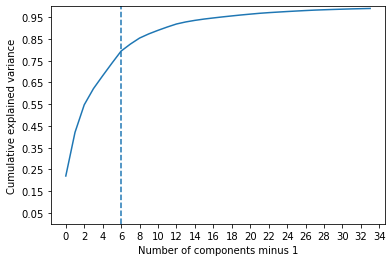

In [42]:
# do a PCA and look at the cumulative variance plot
pca = PCA(n_components = .99, svd_solver = 'full')
pca.fit(data_zs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components minus 1')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05, 1.1, step=.1))
plt.xticks(np.arange(0, 36, step=2))
plt.axvline(x=6, linestyle='--')
plt.ylim(0,1)

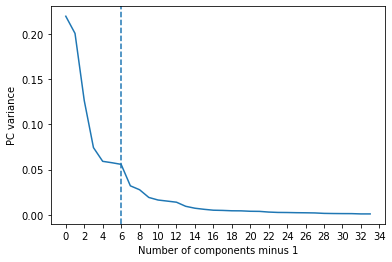

In [43]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components minus 1')
plt.ylabel('PC variance')
plt.xticks(np.arange(0, 36, step=2))
plt.axvline(x=6, linestyle='--')

In [44]:
# now redo the PCA but just keep the top few PCs
data_zs = data_zs_save.copy()
pca = PCA(n_components = 7, svd_solver = 'full')
princ_comps = pca.fit_transform(data_zs)
pca.n_components_

7

In [45]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.21987302 0.42074554 0.54728944 0.62168858 0.68089473 0.73854881
 0.79441562]


In [46]:
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
data_pca.shape

(1046826, 7)

In [47]:
data_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,7.812986,0.782459,-1.692937,0.098349,0.809687,-4.945516,2.719589
1,118.084854,9.786138,199.378118,0.399513,6.409308,-47.300143,27.856300
2,0.236833,-0.261303,0.707700,0.005826,0.003594,0.316049,-0.160373
3,0.834013,-0.204194,1.435032,0.008552,0.035698,0.083755,-0.026838
4,2.085611,-0.089649,2.951878,0.020970,0.159003,-0.774737,0.453820


In [48]:
# zscale the pcs
data_pca_zs = (data_pca - data_pca.mean()) / data_pca.std()
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06
mean,8.659687e-16,4.714162e-16,-6.381481e-16,-4.941921e-17,-1.272819e-15,4.998369e-16,-1.163669e-16
std,4.448435e+00,4.251885e+00,3.374752e+00,2.587648e+00,2.308366e+00,2.277909e+00,2.242323e+00
min,-2.293067e+02,-3.645505e-01,-7.664554e+02,-7.165028e+02,-7.013362e+02,-5.260210e+02,-7.315593e+02
25%,-4.607729e-01,-2.158022e-01,-5.202718e-01,-6.543507e-03,-4.904047e-02,-3.033607e-01,-2.874438e-01
50%,-7.852356e-02,-1.900084e-01,-2.034711e-01,6.802326e-03,2.332644e-02,-4.028889e-02,-6.883125e-02
75%,1.745691e-01,-1.520397e-01,1.047161e-01,2.419782e-02,7.298279e-02,6.243616e-01,8.824867e-02
max,3.036422e+03,1.683254e+03,1.093464e+03,2.126744e+03,1.020287e+03,1.181004e+03,7.825028e+02


In [49]:
data_pca_zs.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.756345,0.184026,-0.501648,0.038007,0.350762,-2.171078,1.212844
1,26.545259,2.301600,59.079339,0.154392,2.776556,-20.764725,12.422965
2,0.053240,-0.061456,0.209704,0.002252,0.001557,0.138745,-0.071521
3,0.187485,-0.048024,0.425226,0.003305,0.015465,0.036769,-0.011969
4,0.468842,-0.021084,0.874695,0.008104,0.068881,-0.340109,0.202388


# Calculate two unsupervised fraud scores¶

## score 1

In [50]:
# Set the powers for the two Minkowski distance. the final results are relatively insensitive to these choices. 
p1 = 2
p2 = 2
ntop = 1000

In [51]:
oop1 = 1/p1
score1 = (((data_pca_zs).abs()**p1).sum(axis=1))**oop1
score1.head(10)

0     3.111159
1    69.235492
2     0.273789
3     0.469062
4     1.070884
5     0.428559
6     0.284815
7     0.295393
8     0.764182
9     0.733115
dtype: float64

In [52]:
score1.max()

940.8780022137556

(0.1, 2089567.4539268154)

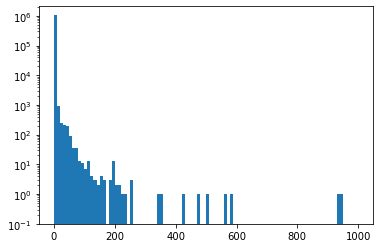

In [53]:
plt.hist(score1, bins =100, range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

## Score 2

In [54]:
NNmodel = MLPRegressor (hidden_layer_sizes=(10), activation='relu', verbose=True, max_iter=15, random_state=1)
NNmodel.fit(data_pca_zs, data_pca_zs)

NameError: name 'MLPRegressor' is not defined

In [ ]:
# calculate score 2 as the autoencoder error
pca_out = NNmodel.predict (data_pca_zs)
error = pca_out - data_pca_zs
oop2=1/p2
score2 = ((error.abs()**p2).sum(axis=1))**oop2

In [ ]:
score2.head(10)

In [ ]:
scores = pd.DataFrame(score1)
scores.columns=['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['RECORD'] = save_record
scores['final'] = (.5*scores['score1 rank'] + .5*scores['score2 rank'])
top_records = scores.sort_values(['final'], ascending = False).head(20).index
scores.head()

In [ ]:
scores_sorted = scores.sort_values(by='final',ascending=False)
scores_sorted.head(10)

In [ ]:
scores.sort_values(by='final',ascending=False).tail(10)

In [ ]:
scores.describe()

In [ ]:
scores_sorted.set_index('RECORD', drop=True, inplace=True)
scores_sorted.head(10)

In [ ]:
sc1max=int(score1.max() )
plt.hist (score1, bins =100, range=(0, sc1max+1))
plt.yscale('log')
plt.ylim(ymin=.1)

In [ ]:
sc2max=int(score2.max() )
sc2max

In [ ]:
sc2max= int(score2.max())
print(sc2max)
plt.hist (score2, bins =100, range=(0, sc2max+1))
plt.yscale('log')
plt.ylim(ymin=.1)

In [ ]:
sns.distplot(scores['final'])

In [ ]:
top_records = scores_sorted.head(ntop).index
print(top_records)

In [ ]:
data_zs['RECORD'] = save_record
data_zs.set_index('RECORD', inplace=True, drop=True)
data_zs.head()

In [ ]:
data_zs_top_n = data_zs.loc[top_records]
data_zs_top_n.transpose()

In [ ]:
scores.set_index('RECORD',inplace=True)
scores.drop(columns=['score1','score2'],inplace=True)
scores.head(30)

In [ ]:
NY_data_with_scores = NY_data_orig.join(scores, on='RECORD')
NY_data_with_scores.set_index('RECORD',inplace=True)
NY_data_with_scores.head(10)

In [ ]:
NY_data_top_n = NY_data_with_scores.sort_values(['final'], ascending = False).head(ntop)
NY_data_top_n

In [ ]:
NY_data_top_n['OWNER'].head(40)

In [ ]:
data_zs_top_n.shape

In [ ]:
NY_top_with_zs.to_excel('NY_top_with_zs.xlsx', index=True)
NY_data_top_n.to_excel('NY_top.xlsx', index=True)
data_zs_top_n.to_csv('data_zs_top.csv', index=True)

In [ ]:
data_zs_top_n.shape

In [ ]:
# The heatmaps show which variables are driving the high scores
data_base_vars = data_zs_top_n.iloc[:,0:17].abs()
data_heatmap = data_base_vars.head(20)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')

In [ ]:
data_zs_top_n_abs = data_zs_top_n.abs()
data_heatmap = data_zs_top_n.abs().head(20)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')